# <center> HW9 </center>
## <center> РЕГРЕССИОННАЯ МОДЕЛЬ АППРОКСИМАЦИИ ФУНКЦИИ </center>

In [1]:
import numpy as np
import math
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from math import sin, exp

### <center> Создаем данные </center>

In [2]:
def f_x_y(x,y):
    return sin(x + 2*y)*exp(-(2*x + y)**2)

i=np.linspace(-10,10,20000)


def build_dataset():
    data = []
    for x in i:
        y = np.sin(x)
        data.append((x, y,f_x_y(x,y))) 
    column_names = ["x", "y", "z"]
    df = pd.DataFrame(data, columns=column_names)
    return df

df = build_dataset()

In [3]:
df

,x,y,z
0,-10.000,0.544021,-1.972643e-165
1,-9.999,0.543182,-2.061290e-165
2,-9.998,0.542342,-2.153862e-165
3,-9.997,0.541501,-2.250529e-165
4,-9.996,0.540660,-2.351469e-165
...,...,...,...
19995,9.996,-0.540660,2.351469e-165
19996,9.997,-0.541501,2.250529e-165
19997,9.998,-0.542342,2.153862e-165
19998,9.999,-0.543182,2.061290e-165


### <center> Строим график функции </center>

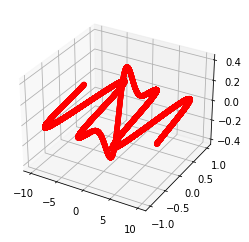

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(df.x, df.y, df.z, color = "red")

### <center> Нормируем и разделяем данные на test, train и validation </center>

In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns = ['x', 'y', 'z'])

In [9]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_valid_test_split(df_scaled, target = 'z', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

In [10]:
X_train_torch = Variable(torch.tensor(np.array(X_train))).float()
X_test_torch = Variable(torch.tensor(np.array(X_test))).float()
X_val_torch = Variable(torch.tensor(np.array(X_val))).float()
y_train_torch = Variable(torch.tensor(Y_train.values)).float()
y_test_torch = Variable(torch.tensor(Y_test.values)).float()
y_val_torch = Variable(torch.tensor(Y_val.values)).float()


### <center> Создаем сеть и определяем параметры </center>

In [11]:
net = nn.Sequential(nn.Linear(X_train.shape[1],100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(),nn.Linear(100, 2))    

In [12]:
criterion = torch.nn.MSELoss(reduction='sum')

In [13]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

### <center> Смотрим работу не обученной сети </center>

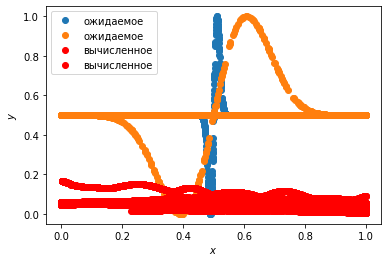

In [14]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='ожидаемое')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='вычисленное');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    

predict(net, X_val_torch, y_val_torch) 

### <center> Создаем тренировочную петлю </center>

training start....
epoch # 1
5106.80712890625
epoch # 2
4984.4462890625
epoch # 3
4863.5166015625
epoch # 4
4743.94140625
epoch # 5
4625.82177734375
epoch # 6
4509.2509765625
epoch # 7
4394.263671875
epoch # 8
4280.86572265625
epoch # 9
4169.140625
epoch # 10
4059.115234375
epoch # 11
3950.80078125
epoch # 12
3844.221435546875
epoch # 13
3739.33837890625
epoch # 14
3636.104248046875
epoch # 15
3534.56640625
epoch # 16
3434.716552734375
epoch # 17
3336.5234375
epoch # 18
3239.966552734375
epoch # 19
3144.991455078125
epoch # 20
3051.681884765625
epoch # 21
2960.06884765625
epoch # 22
2870.16357421875
epoch # 23
2781.9609375
epoch # 24
2695.407470703125
epoch # 25
2610.443603515625
epoch # 26
2527.02783203125
epoch # 27
2445.1669921875
epoch # 28
2364.91162109375
epoch # 29
2286.243408203125
epoch # 30
2209.134765625
epoch # 31
2133.61572265625
epoch # 32
2059.754638671875
epoch # 33
1987.5728759765625
epoch # 34
1917.0501708984375
epoch # 35
1848.166015625
epoch # 36
1780.904541015625
e

epoch # 279
190.09530639648438
epoch # 280
190.07029724121094
epoch # 281
190.0455322265625
epoch # 282
190.02098083496094
epoch # 283
189.9966583251953
epoch # 284
189.9725799560547
epoch # 285
189.94873046875
epoch # 286
189.925048828125
epoch # 287
189.90162658691406
epoch # 288
189.8783721923828
epoch # 289
189.85537719726562
epoch # 290
189.83255004882812
epoch # 291
189.80995178222656
epoch # 292
189.7875213623047
epoch # 293
189.7653045654297
epoch # 294
189.74325561523438
epoch # 295
189.72142028808594
epoch # 296
189.69973754882812
epoch # 297
189.67828369140625
epoch # 298
189.65696716308594
epoch # 299
189.6358642578125
epoch # 300
189.61492919921875
epoch # 301
189.59414672851562
epoch # 302
189.57354736328125
epoch # 303
189.5531005859375
epoch # 304
189.5328369140625
epoch # 305
189.5127410888672
epoch # 306
189.49278259277344
epoch # 307
189.4730224609375
epoch # 308
189.453369140625
epoch # 309
189.4338836669922
epoch # 310
189.41456604003906
epoch # 311
189.39537048339

186.2870330810547
epoch # 553
186.27503967285156
epoch # 554
186.26304626464844
epoch # 555
186.2510223388672
epoch # 556
186.23899841308594
epoch # 557
186.2269744873047
epoch # 558
186.2149200439453
epoch # 559
186.202880859375
epoch # 560
186.19082641601562
epoch # 561
186.17877197265625
epoch # 562
186.16665649414062
epoch # 563
186.15455627441406
epoch # 564
186.1424560546875
epoch # 565
186.1303253173828
epoch # 566
186.11819458007812
epoch # 567
186.1060333251953
epoch # 568
186.0938720703125
epoch # 569
186.08168029785156
epoch # 570
186.0695037841797
epoch # 571
186.05731201171875
epoch # 572
186.04507446289062
epoch # 573
186.0328369140625
epoch # 574
186.02061462402344
epoch # 575
186.0083465576172
epoch # 576
185.99609375
epoch # 577
185.9838409423828
epoch # 578
185.97154235839844
epoch # 579
185.95925903320312
epoch # 580
185.9469451904297
epoch # 581
185.9346466064453
epoch # 582
185.92236328125
epoch # 583
185.9100341796875
epoch # 584
185.89772033691406
epoch # 585
185

182.77301025390625
epoch # 822
182.75674438476562
epoch # 823
182.74041748046875
epoch # 824
182.72401428222656
epoch # 825
182.70758056640625
epoch # 826
182.69105529785156
epoch # 827
182.67446899414062
epoch # 828
182.6578369140625
epoch # 829
182.6411590576172
epoch # 830
182.6243896484375
epoch # 831
182.60757446289062
epoch # 832
182.59072875976562
epoch # 833
182.57382202148438
epoch # 834
182.55685424804688
epoch # 835
182.5398712158203
epoch # 836
182.52279663085938
epoch # 837
182.50564575195312
epoch # 838
182.48849487304688
epoch # 839
182.47125244140625
epoch # 840
182.4539794921875
epoch # 841
182.4365997314453
epoch # 842
182.41921997070312
epoch # 843
182.4017333984375
epoch # 844
182.3842010498047
epoch # 845
182.3666229248047
epoch # 846
182.34896850585938
epoch # 847
182.3312530517578
epoch # 848
182.31349182128906
epoch # 849
182.29563903808594
epoch # 850
182.27774047851562
epoch # 851
182.259765625
epoch # 852
182.24176025390625
epoch # 853
182.22366333007812
epoc

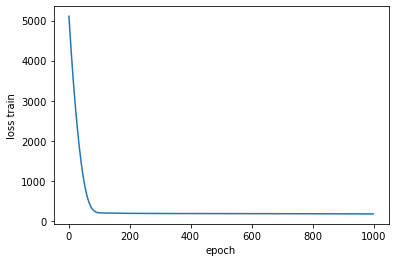

In [15]:
def train():
    net.train()
    losses = []
    for epoch in range(1,1000):
        x_train = Variable(torch.from_numpy((np.array(X_train)))).float()
        y_train = Variable(torch.from_numpy(np.array(Y_train))).float()
        y_pred = net(x_train)
        loss = criterion(y_pred, torch.reshape(y_train, (14000,1)))
        print ("epoch #", epoch)
        print (loss.item())
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses


print ("training start....")
losses = train()
plt.plot(range(1, 1000), losses)
plt.xlabel("epoch")
plt.ylabel("loss train")
plt.show()

### <center> Проверяем обученную модель </center>

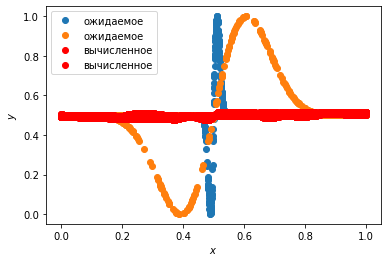

In [16]:
predict(net, X_test_torch, y_test_torch)

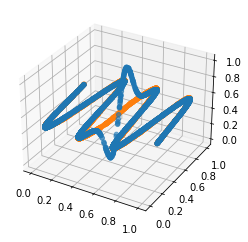

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

pred = net(X_test_torch)
pred = pred.detach().numpy()
z_df = pd.DataFrame(Y_test, columns = ['z'])
z_pred = pd.DataFrame(pred, columns = ['z', ''])




ax.scatter(X_test.x, X_test.y, z_df.z, 'o')
ax.scatter(X_test.x, X_test.y, z_pred.z, '^')